In [30]:
# Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Add these imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# For Regression Problems:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the data
prop = pd.read_excel('c:\\Users\\88\\Desktop\\Properties.xlsx')
prop_Ti = pd.read_excel('c:\\Users\\88\\Desktop\\Properties-Ti.xlsx')
# propNormal = pd.read_excel('c:\\Users\\88\\Desktop\\Properties Normal.xlsx')
target = pd.read_excel('c:\\Users\\88\\Desktop\\Targets.xlsx')
target_Ti = pd.read_excel('c:\\Users\\88\\Desktop\\Targets-Ti.xlsx')
prop_NoTi = pd.read_excel('c:\\Users\\88\\Desktop\\Properties-NoTi.xlsx')
target_NoTi = pd.read_excel('c:\\Users\\88\\Desktop\\Targets-NoTi.xlsx')

# Convert all columns to float. For hash problem, please change it in the excel file, terget.replace does not work.
# target = target.apply(pd.to_numeric)

# target.info() 

print(prop.head())
# print(propNormal.head())
print(target.head())

# Assuming X is your feature matrix (prop or propNormal) and y is your target
X = prop  # or propNormal, depending on which you want to use

   n_number  alpha  beta     A_EN      D_EN     A_RAM      D_RAM    A_WF  \
0         1      1     0  1.72925  0.479917  33.68175  15.140597  3.2150   
1         1      1     0  1.85975  0.702895  34.18075  14.434586  3.2150   
2         1      1     0  1.80500  0.479503  33.95750  15.025674  3.3475   
3         1      1     0  1.89550  0.693003  44.86600  19.925865  3.2450   
4         1      1     0  1.82450  0.485173  45.09375  21.610734  3.4150   

       D_WF      A_IE  ...  A_BP_AS  A_BP_XS  A_RW_MS  P_RW_MS  A_RW_AS  \
0  1.856940  7.725575  ...     4608    19722     2.04     0.14     1.62   
1  1.856940  8.544025  ...     4608    19722     2.49     0.29     1.62   
2  1.939567  8.267050  ...      132    19722     1.26     0.40     0.06   
3  1.873506  8.547400  ...     6348    19722     2.40     0.32     1.44   
4  1.990534  8.203975  ...     2724    19722     1.23     0.41     0.00   

   A_RW_XS  A_RC_MS  P_RC_MS  A_RC_AS  A_RC_XS  
0     2.46     2.91     0.49     1.44     4

## Feature selection

In [6]:
# Only site-specific features are used

columns_to_drop = X.columns[3:23].tolist()
print("Dropping the following columns:", columns_to_drop)
X = X.drop(columns=columns_to_drop)



Dropping the following columns: ['A_EN', 'D_EN', 'A_RAM', 'D_RAM', 'A_WF', 'D_WF', 'A_IE', 'D_IE', 'A_GN', 'D_GN', 'A_EA', 'D_EA', 'A_MP', 'D_MP', 'A_BP', 'D_BP', 'A_RW', 'D_RW', 'A_RC', 'D_RC']


In [17]:
# Only overall features are used

columns_to_drop = X.columns[23:].tolist()
print("Dropping the following columns:", columns_to_drop)
X = X.drop(columns=columns_to_drop)


Dropping the following columns: ['A_EN_MS', 'P_EN_MS', 'A_EN_AS', 'A_EN_XS', 'A_RAM_MS', 'P_RAM_MS', 'A_RAM_AS', 'A_RAM_XS', 'A_WF_MS', 'P_WF_MS', 'A_WF_AS', 'A_WF_XS', 'A_IE_MS', 'P_IE_MS', 'A_IE_AS', 'A_IE_XS', 'A_GN_MS', 'P_GN_MS', 'A_GN_AS', 'A_GN_XS', 'A_EA_MS', 'P_EA_MS', 'A_EA_AS', 'A_EA_XS', 'A_MP_MS', 'P_MP_MS', 'A_MP_AS', 'A_MP_XS', 'A_BP_MS', 'P_BP_MS', 'A_BP_AS', 'A_BP_XS', 'A_RW_MS', 'P_RW_MS', 'A_RW_AS', 'A_RW_XS', 'A_RC_MS', 'P_RC_MS', 'A_RC_AS', 'A_RC_XS']


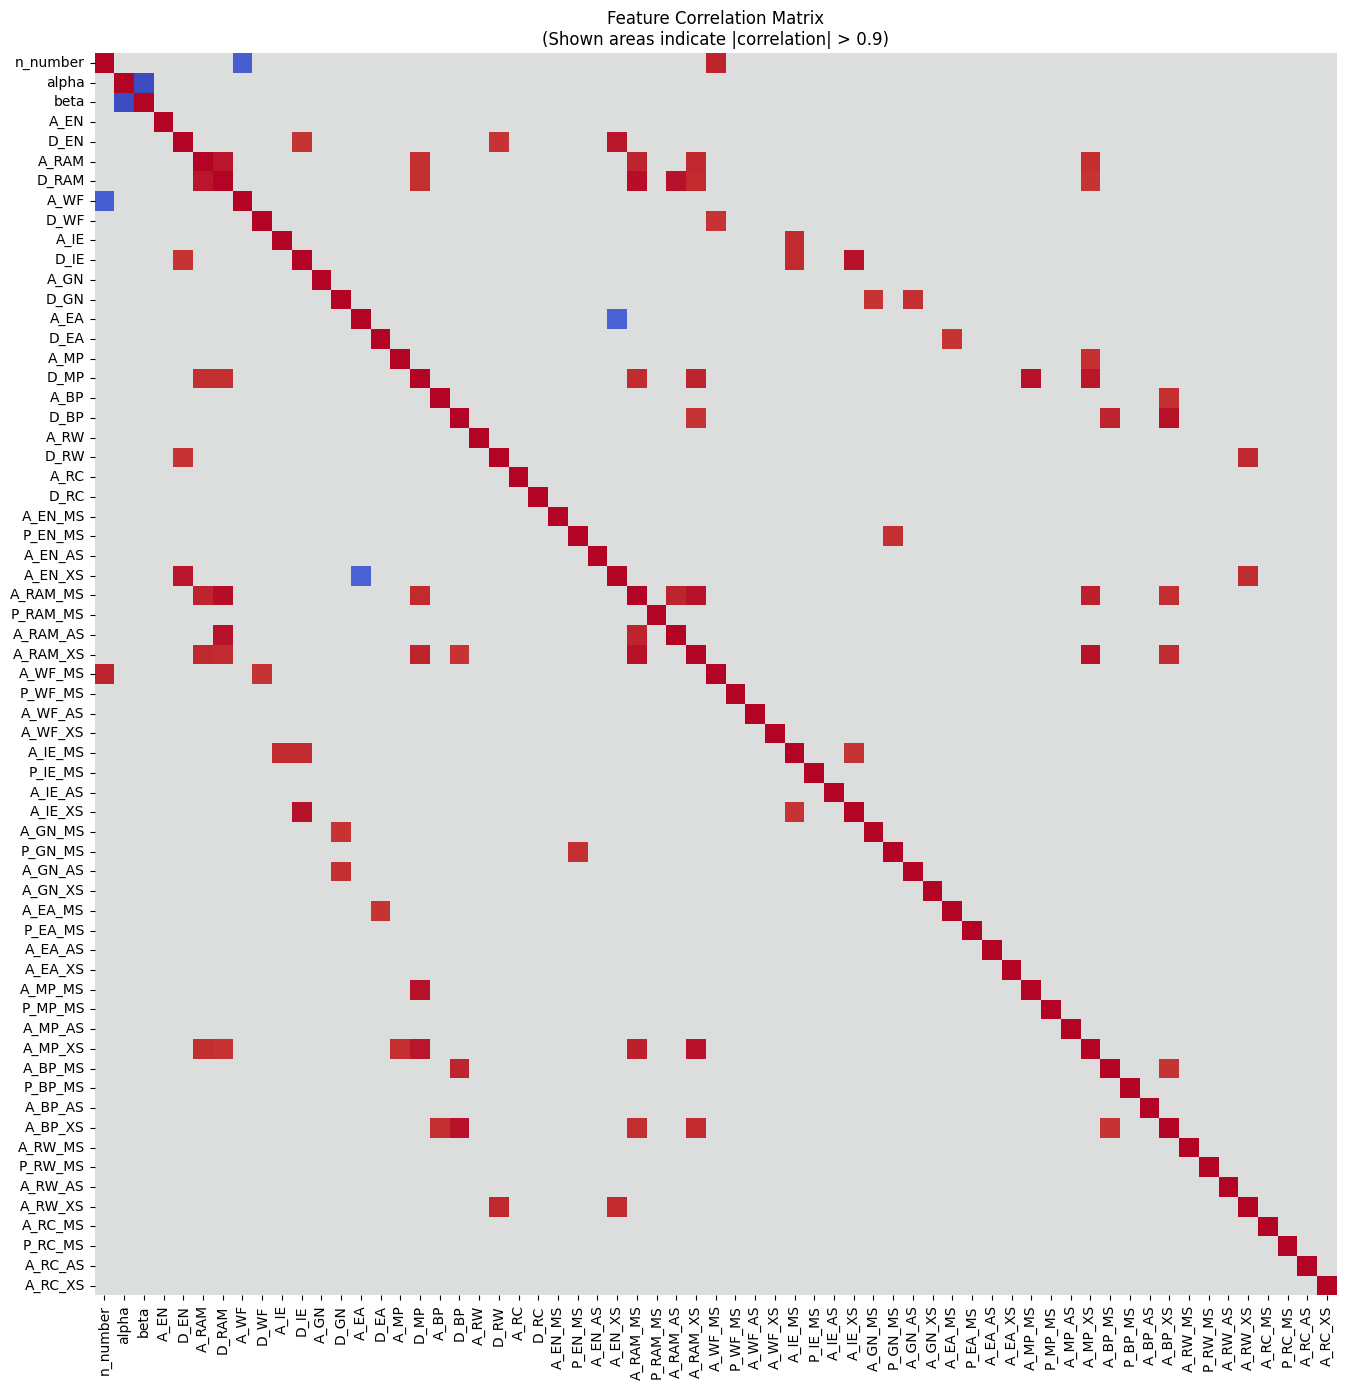


Dropping 21 highly correlated features (correlation > 0.9):
['D_RAM', 'A_WF', 'D_IE', 'D_MP', 'D_RW', 'A_EN_XS', 'A_RAM_MS', 'A_RAM_AS', 'A_RAM_XS', 'A_WF_MS', 'A_IE_MS', 'A_IE_XS', 'A_GN_MS', 'P_GN_MS', 'A_GN_AS', 'A_EA_MS', 'A_MP_MS', 'A_MP_XS', 'A_BP_MS', 'A_BP_XS', 'A_RW_XS']

Features retained: ['n_number', 'alpha', 'beta', 'A_EN', 'D_EN', 'A_RAM', 'D_WF', 'A_IE', 'A_GN', 'D_GN', 'A_EA', 'D_EA', 'A_MP', 'A_BP', 'D_BP', 'A_RW', 'A_RC', 'D_RC', 'A_EN_MS', 'P_EN_MS', 'A_EN_AS', 'P_RAM_MS', 'P_WF_MS', 'A_WF_AS', 'A_WF_XS', 'P_IE_MS', 'A_IE_AS', 'A_GN_XS', 'P_EA_MS', 'A_EA_AS', 'A_EA_XS', 'P_MP_MS', 'A_MP_AS', 'P_BP_MS', 'A_BP_AS', 'A_RW_MS', 'P_RW_MS', 'A_RW_AS', 'A_RC_MS', 'P_RC_MS', 'A_RC_AS', 'A_RC_XS']


In [31]:
# Features selection by correlation

# Add after data loading and before data splitting:
def analyze_and_filter_correlations(X, correlation_threshold=0.9, categorical_pairs=None):
    """
    Analyze correlations and remove highly correlated features while preserving specified categorical pairs
    
    Parameters:
    - X: DataFrame with features
    - correlation_threshold: threshold for correlation filtering
    - categorical_pairs: list of tuples containing paired categorical feature names to preserve
    """
    if categorical_pairs is None:
        categorical_pairs = [('alpha', 'beta')]  # Default to our crystal phase pairs
    
    correlation_matrix = X.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(16, 14))
    
    # Create mask for correlations above threshold
    mask_high_corr = np.abs(correlation_matrix) > correlation_threshold

    values_high_corr = correlation_matrix*mask_high_corr
    

    
    # Plot base heatmap
    # sns.heatmap(correlation_matrix, 
    #             annot=False,
    #             cmap='coolwarm',
    #             center=0)
    
    # Overlay high correlations with a crosshatch pattern
    sns.heatmap(values_high_corr, 
                cmap='coolwarm',  # Transparent
                center=0,
                cbar=False,
                hatch='xxx',
                square=True)  # Add crosshatch pattern
    
    plt.title('Feature Correlation Matrix\n(Shown areas indicate |correlation| > {})'.format(correlation_threshold))
    plt.tight_layout()
    plt.show()
    
    # Modify feature dropping logic
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = []
    
    # Check correlations and build drop list while respecting categorical pairs
    for column in upper_tri.columns:
        if any(abs(upper_tri[column]) > correlation_threshold):
            # Check if this column is part of a categorical pair
            should_drop = True
            for pair in categorical_pairs:
                if column in pair:
                    should_drop = False
                    break
            if should_drop:
                to_drop.append(column)
    
    # Print dropped features
    if to_drop:
        print(f"\nDropping {len(to_drop)} highly correlated features (correlation > {correlation_threshold}):")
        print(to_drop)
    else:
        print(f"\nNo features found with correlation > {correlation_threshold}")
    
    # Return filtered dataset
    X_filtered = X.drop(columns=to_drop)
    print(f"\nFeatures retained: {X_filtered.columns.tolist()}")
    return X_filtered, correlation_matrix

# Apply correlation analysis before splitting the data
# For Normal training
X_filtered, corr_matrix = analyze_and_filter_correlations(X)
X = X_filtered  # Update X with filtered features
    
# For Generalization training
# X_filtered_train, corr_matrix_train = analyze_and_filter_correlations(X_train)
# X_train = X_filtered_train
# # Apply same feature selection to test set
# X_test = X_test[X_filtered_train.columns]

# Continue with the rest of your code using X_train and X_test


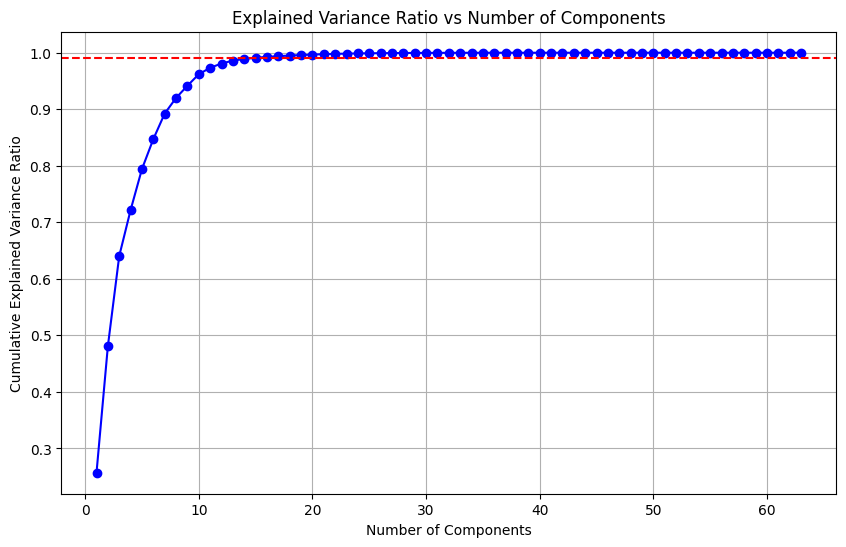

Selected 15 components to explain 99.0% of variance


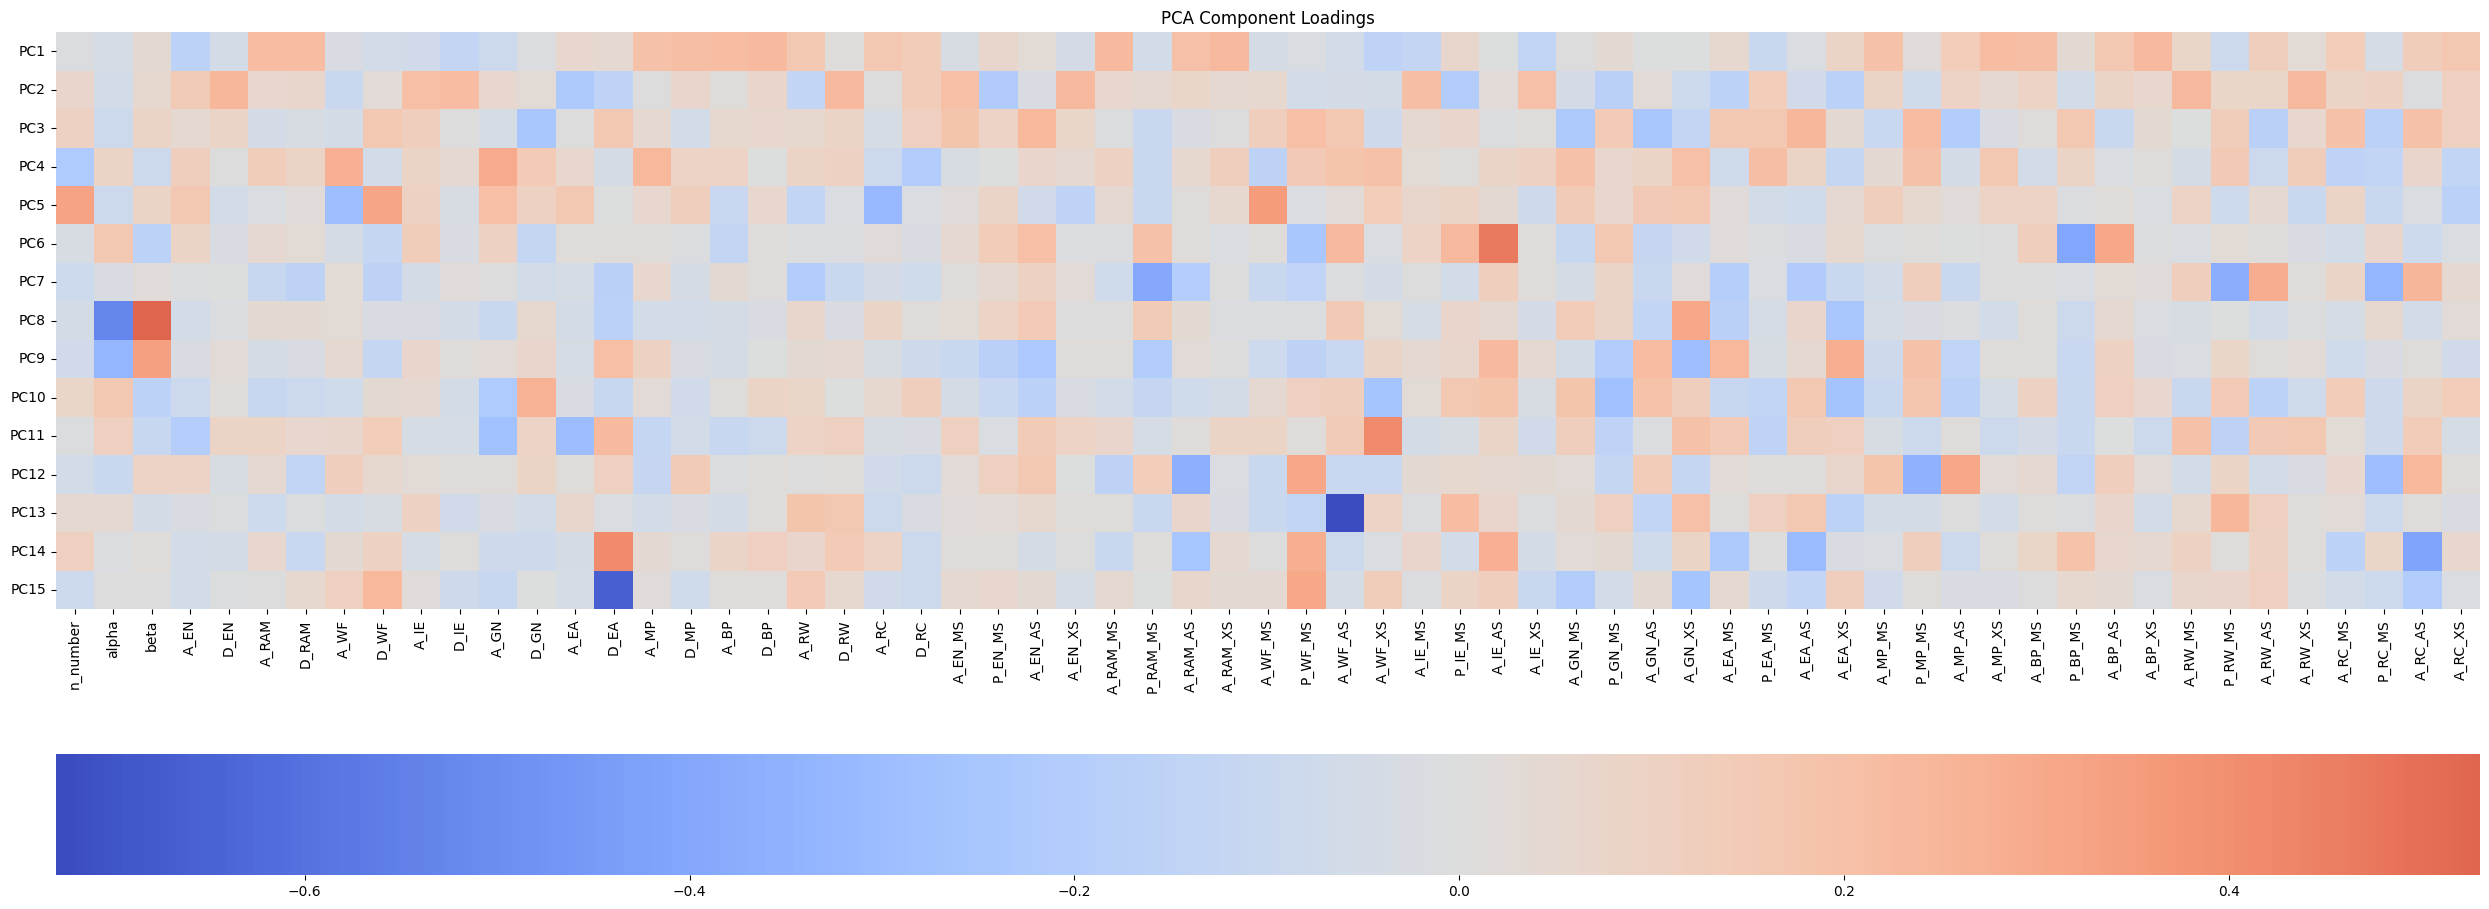

PCA features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']


In [26]:
# PCA

# After correlation analysis and before model training
from sklearn.decomposition import PCA

def apply_pca(X, n_components=None, variance_threshold=0.99):
    """
    Apply PCA to the features and return transformed data
    
    Parameters:
    - X: DataFrame with features
    - n_components: Number of components to keep (if None, use variance_threshold)
    - variance_threshold: Minimum cumulative explained variance ratio to maintain
    """
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize PCA
    if n_components is None:
        # Start with all components
        pca = PCA()
    else:
        pca = PCA(n_components=n_components)
    
    # Fit and transform the data
    X_pca = pca.fit_transform(X_scaled)
    
    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.grid(True)
    plt.show()
    
    # If n_components wasn't specified, determine it based on variance threshold
    if n_components is None:
        n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
        print(f"Selected {n_components} components to explain {variance_threshold*100:.1f}% of variance")
        
        # Create new PCA with determined number of components
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)
    
    # Create DataFrame with PCA results
    X_pca_df = pd.DataFrame(
        X_pca,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    if hasattr(X, 'columns'):  # Check if X has column names
        # Get feature loadings
        loadings = pd.DataFrame(
            pca.components_,  # Remove transpose to swap axes
            columns=X.columns,  # Columns become the features
            index=[f'PC{i+1}' for i in range(pca.n_components_)]  # Index becomes the PCs
        )
        
        # Plot heatmap of loadings
        plt.figure(figsize=(25, 10))  # Made figure wide and short for horizontal layout
        sns.heatmap(loadings, annot=False, cmap='coolwarm', center=0, square=True, cbar_kws={'orientation': 'horizontal'})  # Added horizontal colorbar
        plt.title('PCA Component Loadings')
        plt.tight_layout()
        plt.show()
    
    return X_pca_df, pca

# Apply PCA to the filtered features
X_pca, pca_model = apply_pca(X)

# Update X to use PCA transformed features
X = X_pca

print(f"PCA features: {X.columns.tolist()}")

# Now continue with your existing train/test split and model training

In [32]:
# Data split for Normal training

# Use the first column of target as y, and print its name
y = target.iloc[:, 1]
print("Target:", y.name)
# print(y)

# Good practice to verify shapes
# print("X shape:", X.shape)  # Should be (n_samples, n_features)
# print("y shape:", y.shape)  # Should be (n_samples,)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


Target: E_cohesive


Features: 42, MSE: 0.048945
Features: 41, MSE: 0.052187
Features: 40, MSE: 0.049079
Features: 39, MSE: 0.047793
Features: 38, MSE: 0.044480
Features: 37, MSE: 0.045629
Features: 36, MSE: 0.045428
Features: 35, MSE: 0.055503
Features: 34, MSE: 0.055498
Features: 33, MSE: 0.062547
Features: 32, MSE: 0.061042
Features: 31, MSE: 0.059807
Features: 30, MSE: 0.058899
Features: 29, MSE: 0.056295
Features: 28, MSE: 0.056130
Features: 27, MSE: 0.053831
Features: 26, MSE: 0.052949
Features: 25, MSE: 0.058706
Features: 24, MSE: 0.057763
Features: 23, MSE: 0.057785
Features: 22, MSE: 0.057778
Features: 21, MSE: 0.057788
Features: 20, MSE: 0.056322
Features: 19, MSE: 0.056450
Features: 18, MSE: 0.056375
Features: 17, MSE: 0.056480
Features: 16, MSE: 0.066249
Features: 15, MSE: 0.063545
Features: 14, MSE: 0.063528
Features: 13, MSE: 0.062796
Features: 12, MSE: 0.065332
Features: 11, MSE: 0.064480
Features: 10, MSE: 0.063966
Features: 9, MSE: 0.063871
Features: 8, MSE: 0.082194

Early stopping trigge

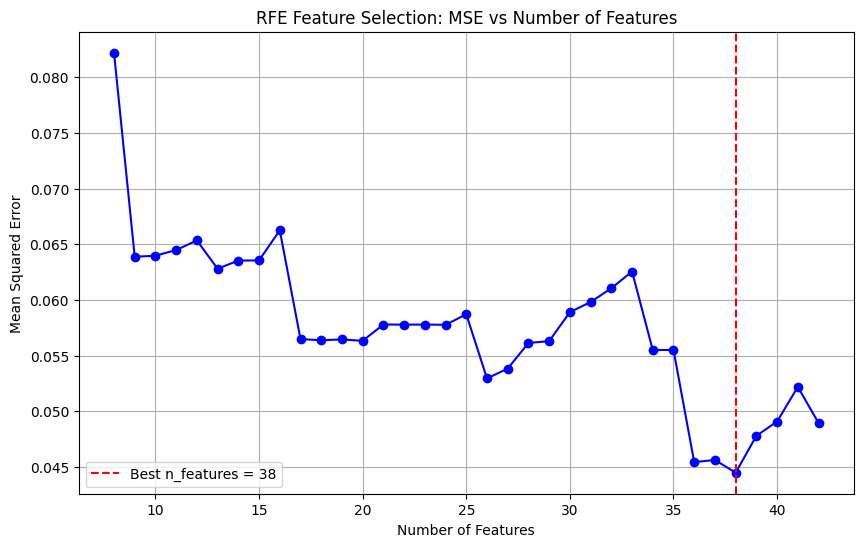


Optimal number of features: 38
Selected features: ['n_number', 'alpha', 'beta', 'A_EN', 'D_EN', 'A_RAM', 'D_WF', 'A_IE', 'A_GN', 'D_GN', 'A_EA', 'D_EA', 'D_BP', 'A_RW', 'A_RC', 'D_RC', 'A_EN_MS', 'P_EN_MS', 'A_EN_AS', 'P_RAM_MS', 'P_WF_MS', 'A_WF_AS', 'A_WF_XS', 'P_IE_MS', 'A_IE_AS', 'A_GN_XS', 'P_EA_MS', 'A_EA_AS', 'A_EA_XS', 'P_MP_MS', 'P_BP_MS', 'A_RW_MS', 'P_RW_MS', 'A_RW_AS', 'A_RC_MS', 'P_RC_MS', 'A_RC_AS', 'A_RC_XS']
RFE features: ['n_number', 'alpha', 'beta', 'A_EN', 'D_EN', 'A_RAM', 'D_WF', 'A_IE', 'A_GN', 'D_GN', 'A_EA', 'D_EA', 'D_BP', 'A_RW', 'A_RC', 'D_RC', 'A_EN_MS', 'P_EN_MS', 'A_EN_AS', 'P_RAM_MS', 'P_WF_MS', 'A_WF_AS', 'A_WF_XS', 'P_IE_MS', 'A_IE_AS', 'A_GN_XS', 'P_EA_MS', 'A_EA_AS', 'A_EA_XS', 'P_MP_MS', 'P_BP_MS', 'A_RW_MS', 'P_RW_MS', 'A_RW_AS', 'A_RC_MS', 'P_RC_MS', 'A_RC_AS', 'A_RC_XS']

Dropped features: ['A_MP', 'A_BP', 'A_MP_AS', 'A_BP_AS']


In [33]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
import numpy as np

def apply_rfe_with_early_stopping(X, y, min_features=2, cv=20, patience=2):
    """
    Apply RFE with early stopping based on cross-validation MSE
    
    Parameters:
    - X: DataFrame with features
    - y: Target variable
    - min_features: Minimum number of features to keep
    - cv: Number of cross-validation folds
    - patience: Number of consecutive worse scores before stopping
    """
    n_features = X.shape[1]
    estimator = Ridge()
    
    # Track best score and features
    best_score = float('-inf')  # Using negative MSE, so higher is better
    best_n_features = n_features
    patience_counter = 0
    scores_history = []
    
    # Try different numbers of features
    for n in range(n_features, min_features - 1, -1):
        # Create RFE with current number of features
        rfe = RFE(estimator=estimator, n_features_to_select=n, step=1)
        
        # Fit RFE
        rfe.fit(X, y)
        
        # Get selected features
        selected_features = X.columns[rfe.support_].tolist()
        X_selected = X[selected_features]
        
        # Calculate cross-validation score
        scores = cross_val_score(estimator, X_selected, y, 
                               scoring='neg_mean_squared_error', 
                               cv=cv)
        current_score = np.mean(scores)
        scores_history.append({'n_features': n, 'score': current_score})
        
        print(f"Features: {n}, MSE: {-current_score:.6f}")
        
        # Check if score improved
        if current_score > best_score:
            best_score = current_score
            best_n_features = n
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"\nEarly stopping triggered! Score hasn't improved for {patience} iterations")
                break
    
    # Final RFE with best number of features
    final_rfe = RFE(estimator=estimator, n_features_to_select=best_n_features, step=1)
    final_rfe.fit(X, y)
    selected_features = X.columns[final_rfe.support_].tolist()
    
    # Plot scores history
    plt.figure(figsize=(10, 6))
    scores_df = pd.DataFrame(scores_history)
    plt.plot(scores_df['n_features'], -scores_df['score'], 'bo-')
    plt.axvline(x=best_n_features, color='r', linestyle='--', 
                label=f'Best n_features = {best_n_features}')
    plt.xlabel('Number of Features')
    plt.ylabel('Mean Squared Error')
    plt.title('RFE Feature Selection: MSE vs Number of Features')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"\nOptimal number of features: {best_n_features}")
    print("Selected features:", selected_features)
    
    # Get dropped features
    dropped_features = [col for col in X.columns if col not in selected_features]
    
    return X[selected_features], final_rfe, dropped_features

# Apply RFE with early stopping
X_rfe, rfe_selector, dropped_features = apply_rfe_with_early_stopping(X, y, min_features=2, patience=30)

X = X_rfe

print(f"RFE features: {X_rfe.columns.tolist()}")
print(f"\nDropped features: {dropped_features}")



Tuning Ridge...
Fold 1 - MSE: 0.0124
Fold 2 - MSE: 0.0233
Fold 3 - MSE: 0.0349
Fold 4 - MSE: 0.0071
Fold 5 - MSE: 0.0168
Fold 6 - MSE: 0.0247
Fold 7 - MSE: 0.0112
Fold 8 - MSE: 0.0165
Fold 9 - MSE: 0.0925
Fold 10 - MSE: 0.0124
Fold 11 - MSE: 0.0101
Fold 12 - MSE: 0.0109
Fold 13 - MSE: 0.0017
Fold 14 - MSE: 0.0058
Fold 15 - MSE: 0.0046
Fold 16 - MSE: 0.0030
Fold 17 - MSE: 0.0148
Fold 18 - MSE: 0.0122
Fold 19 - MSE: 0.0438
Fold 20 - MSE: 0.0068

Ridge Final Results:
Average MSE: 0.0183 ± 0.0199


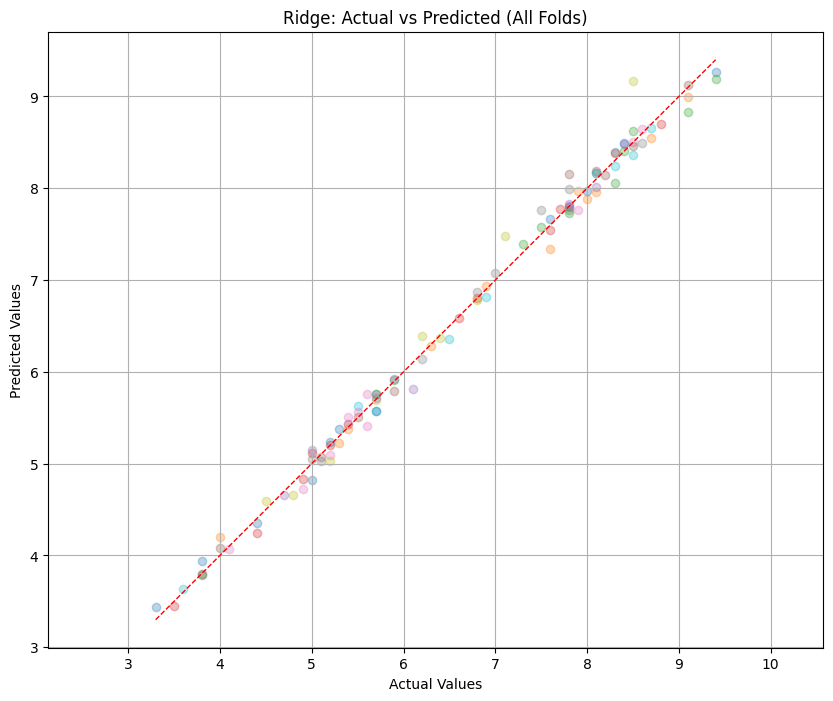


Tuning SVR...
Fold 1 - MSE: 0.0033
Fold 2 - MSE: 0.0187
Fold 3 - MSE: 0.0076
Fold 4 - MSE: 0.0134
Fold 5 - MSE: 0.0073
Fold 6 - MSE: 0.0385
Fold 7 - MSE: 0.0056
Fold 8 - MSE: 0.0351
Fold 9 - MSE: 0.1269
Fold 10 - MSE: 0.0171
Fold 11 - MSE: 0.0046
Fold 12 - MSE: 0.0048
Fold 13 - MSE: 0.0008
Fold 14 - MSE: 0.0029
Fold 15 - MSE: 0.0094
Fold 16 - MSE: 0.0050
Fold 17 - MSE: 0.0102
Fold 18 - MSE: 0.0157
Fold 19 - MSE: 0.0557
Fold 20 - MSE: 0.0006

SVR Final Results:
Average MSE: 0.0192 ± 0.0284


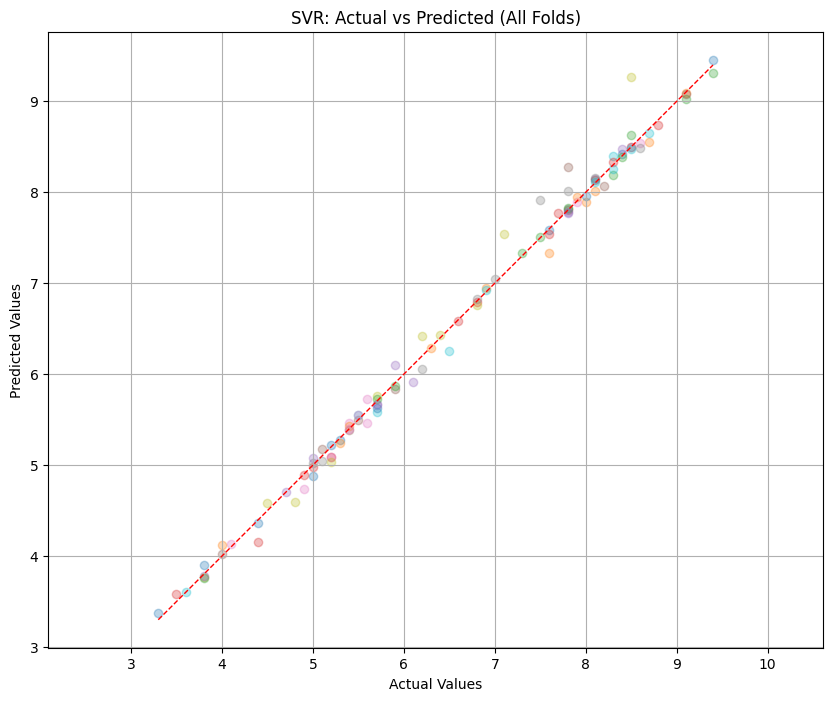


Tuning Lasso...
Fold 1 - MSE: 0.0081


c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e-02, tolerance: 2.683e-02
  model = cd_fast.enet_coordinate_descent(


Fold 2 - MSE: 0.0260
Fold 3 - MSE: 0.0343
Fold 4 - MSE: 0.0100
Fold 5 - MSE: 0.0153
Fold 6 - MSE: 0.0269
Fold 7 - MSE: 0.0088
Fold 8 - MSE: 0.0204
Fold 9 - MSE: 0.0895
Fold 10 - MSE: 0.0114
Fold 11 - MSE: 0.0070
Fold 12 - MSE: 0.0116
Fold 13 - MSE: 0.0013
Fold 14 - MSE: 0.0091


c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e-02, tolerance: 2.641e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.864e-02, tolerance: 2.722e-02
  model = cd_fast.enet_coordinate_descent(


Fold 15 - MSE: 0.0024
Fold 16 - MSE: 0.0032


c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e-02, tolerance: 2.678e-02
  model = cd_fast.enet_coordinate_descent(


Fold 17 - MSE: 0.0069
Fold 18 - MSE: 0.0119


c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e-02, tolerance: 2.785e-02
  model = cd_fast.enet_coordinate_descent(


Fold 19 - MSE: 0.0530
Fold 20 - MSE: 0.0080

Lasso Final Results:
Average MSE: 0.0183 ± 0.0204


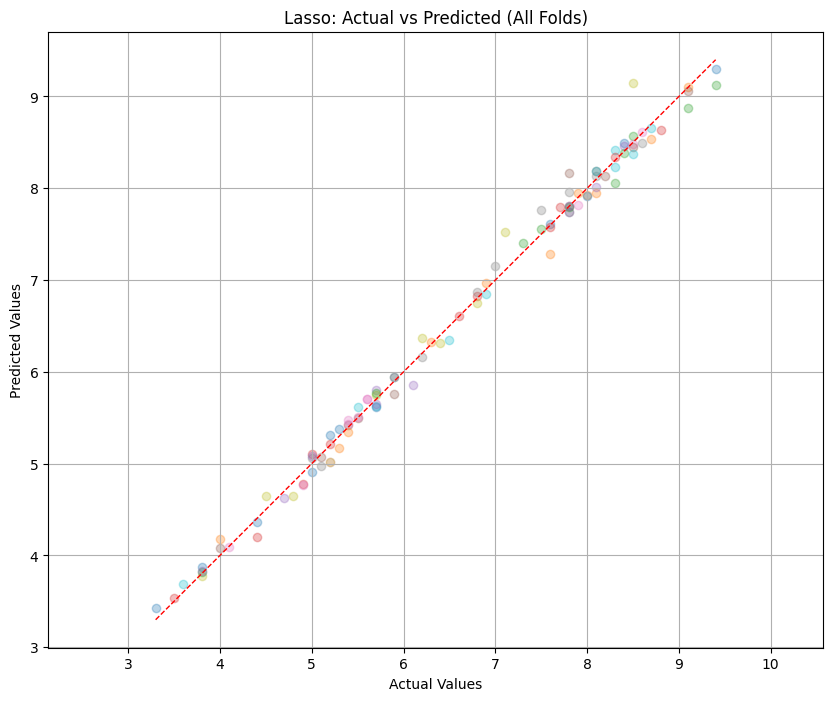

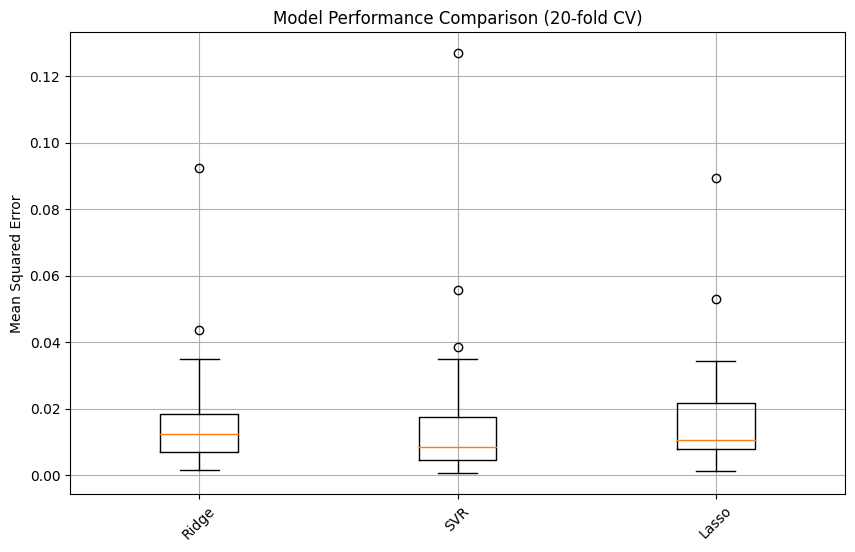

,Average MSE,Std MSE
Ridge,0.018281,0.019877
SVR,0.019160,0.028351
Lasso,0.018267,0.020357


In [34]:
def train_selected_regression_models_with_tuning(n_splits=20):
    # Parameter grids for each model
    param_grids = {
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['rbf', 'linear'],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'max_iter': [1000, 2000, 3000]
            }
        }
    }
    
    results = {}
    # Create KFold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for name, model_info in param_grids.items():
        print(f"\nTuning {name}...")
        
        # Lists to store metrics for each fold
        fold_mse_scores = []
        fold_predictions = []
        
        # Perform k-fold cross validation
        for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
            # Split data for this fold
            X_train_fold = X.iloc[train_idx]
            X_test_fold = X.iloc[test_idx]
            y_train_fold = y.iloc[train_idx]
            y_test_fold = y.iloc[test_idx]
            
            # Scale the features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_test_scaled = scaler.transform(X_test_fold)
            
            # Use GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(
                estimator=model_info['model'],
                param_grid=model_info['params'],
                cv=5,  # Inner cross-validation for tuning
                scoring='neg_mean_squared_error',
                n_jobs=-1
            )
            
            # Fit the model
            grid_search.fit(X_train_scaled, y_train_fold)
            
            # Get predictions for this fold
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_scaled)
            mse = mean_squared_error(y_test_fold, y_pred)
            
            # Store results for this fold
            fold_mse_scores.append(mse)
            fold_predictions.append((y_test_fold, y_pred))
            
            print(f'Fold {fold} - MSE: {mse:.4f}')
        
        # Calculate average metrics
        avg_mse = np.mean(fold_mse_scores)
        std_mse = np.std(fold_mse_scores)
        
        # Store results
        results[name] = {
            'avg_mse': avg_mse,
            'std_mse': std_mse,
            'fold_mse_scores': fold_mse_scores,
            'fold_predictions': fold_predictions
        }
        
        print(f'\n{name} Final Results:')
        print(f'Average MSE: {avg_mse:.4f} ± {std_mse:.4f}')
        
        # Plot combined results
        plt.figure(figsize=(10, 8))
        for y_test_fold, y_pred in fold_predictions:
            plt.scatter(y_test_fold, y_pred, alpha=0.3)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=1)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name}: Actual vs Predicted (All Folds)')
        plt.axis('equal')
        plt.grid(True)
        plt.show()

    return results

# Run the models with 20-fold cross-validation
results_cv = train_selected_regression_models_with_tuning(n_splits=20)

# Visualize the results
def visualize_cv_results(results_cv):
    # Create box plot of MSE scores
    plt.figure(figsize=(10, 6))
    mse_scores = [results['fold_mse_scores'] for results in results_cv.values()]
    plt.boxplot(mse_scores, labels=results_cv.keys())
    plt.title('Model Performance Comparison (20-fold CV)')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
    # Create comparison table
    comparison_data = {
        'Average MSE': [results['avg_mse'] for results in results_cv.values()],
        'Std MSE': [results['std_mse'] for results in results_cv.values()]
    }
    comparison_df = pd.DataFrame(comparison_data, index=results_cv.keys())
    display(comparison_df)

# Visualize the cross-validation results
visualize_cv_results(results_cv)

In [22]:
# NOT IN USE Data split for Generalization training
# Split the data
X_train = prop_NoTi
X_test = prop_Ti

y_train = target_NoTi.iloc[:, 1]
y_test = target_Ti.iloc[:, 1]
print("Target:", y_test.name)

Target: E_cohesive


[ 9.8  3.4  6.1  1.4  2.7  2.  13.4  2.6  1.1  2.   4.1  4.8  7.5  3.1
  3.7  3.8  3. ]

Tuning Linear Regression...


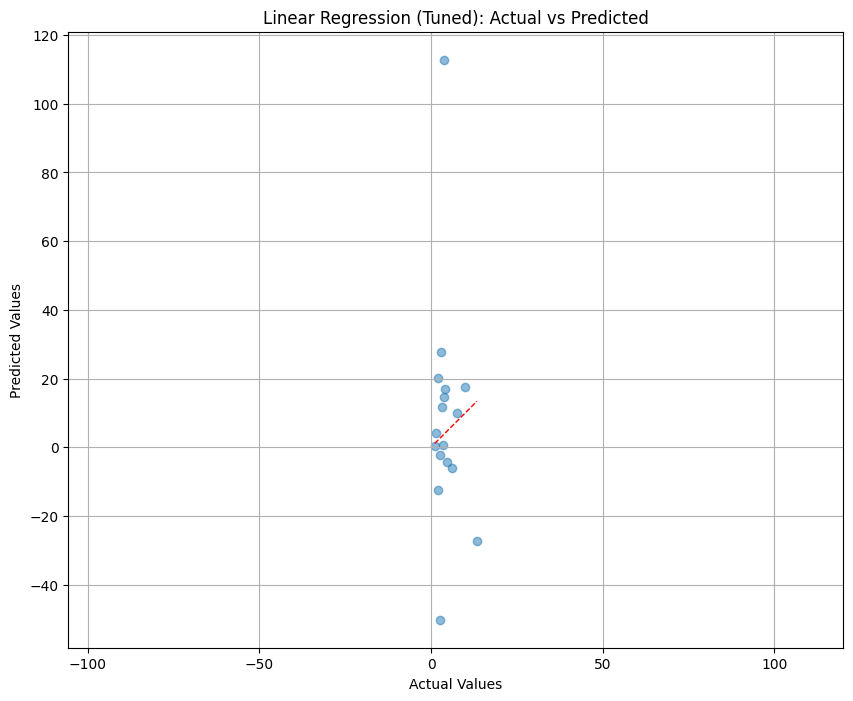

Linear Regression Results:
Best Parameters: {}
Best MSE (cross-validation): 25408500183559800648368128.0000
Test MSE: 1071.3333
Predicted values: [ 17.5505441    0.57788785  -6.0822684    4.24780972 -50.2463309
  20.0661691  -27.4338309   -2.40844028   0.23413785 -12.60179965
  16.9724191   -4.4572684   10.07984097  11.60327847  14.5192941
 112.8317941   27.8317941 ]

Tuning Ridge...


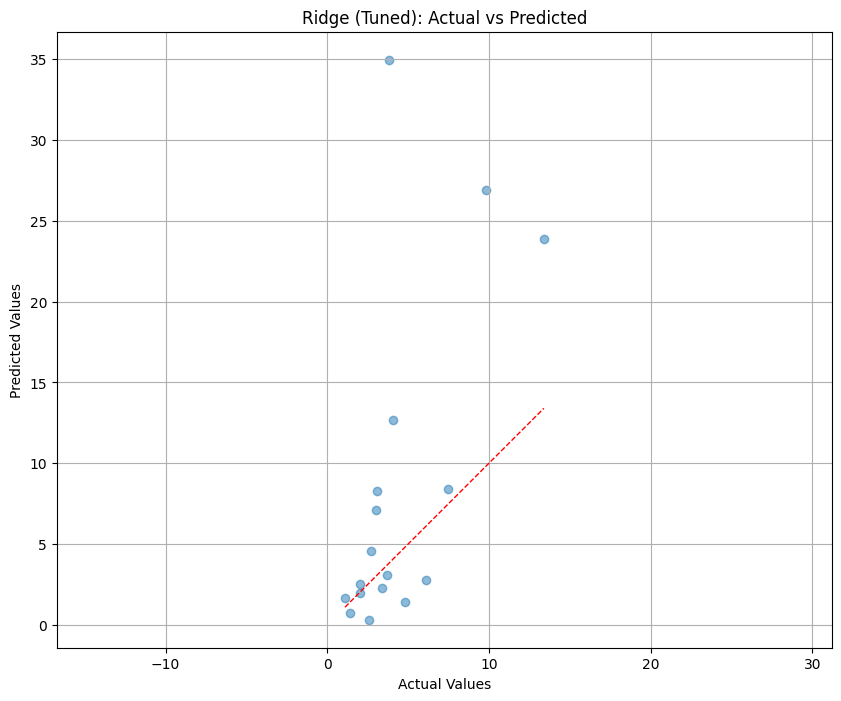

Ridge Results:
Best Parameters: {'alpha': 10.0, 'solver': 'auto'}
Best MSE (cross-validation): 209.8425
Test MSE: 89.8292
Predicted values: [26.92903638  2.29492544  2.75722055  0.75714328  4.604956    1.98878912
 23.89908445  0.32518744  1.69744617  2.51727174 12.68663246  1.41454534
  8.39251684  8.31134258  3.12177532 34.96125397  7.0890864 ]

Tuning Random Forest...


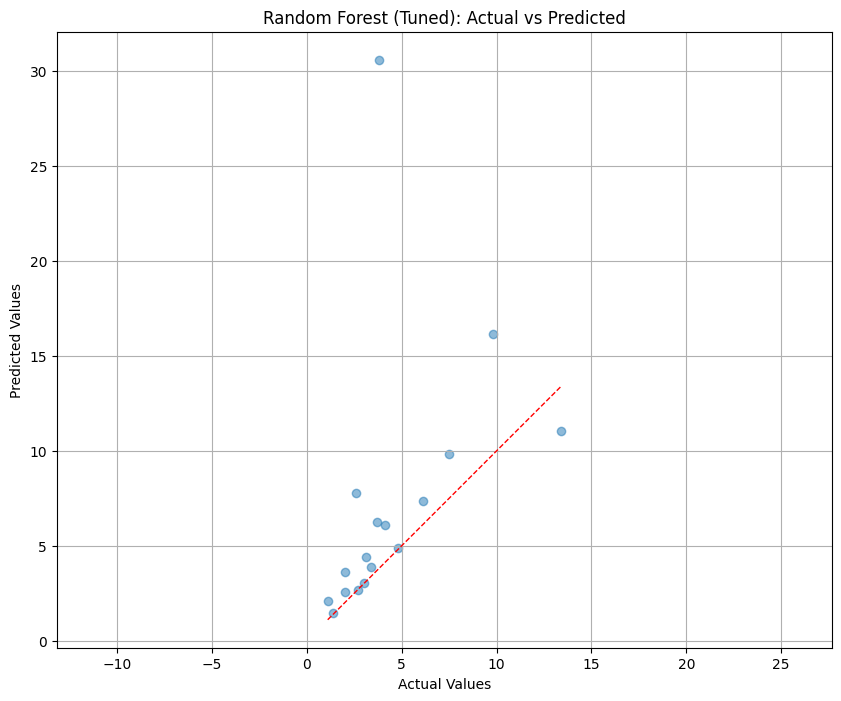

Random Forest Results:
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best MSE (cross-validation): 198.1743
Test MSE: 47.9382
Predicted values: [16.13806496  3.86621259  7.35298614  1.46593799  2.65983247  2.58227561
 11.05340212  7.80381765  2.07221873  3.61550968  6.07955642  4.88229229
  9.84453508  4.40060123  6.22561784 30.61436509  3.05137742]

Tuning SVR...


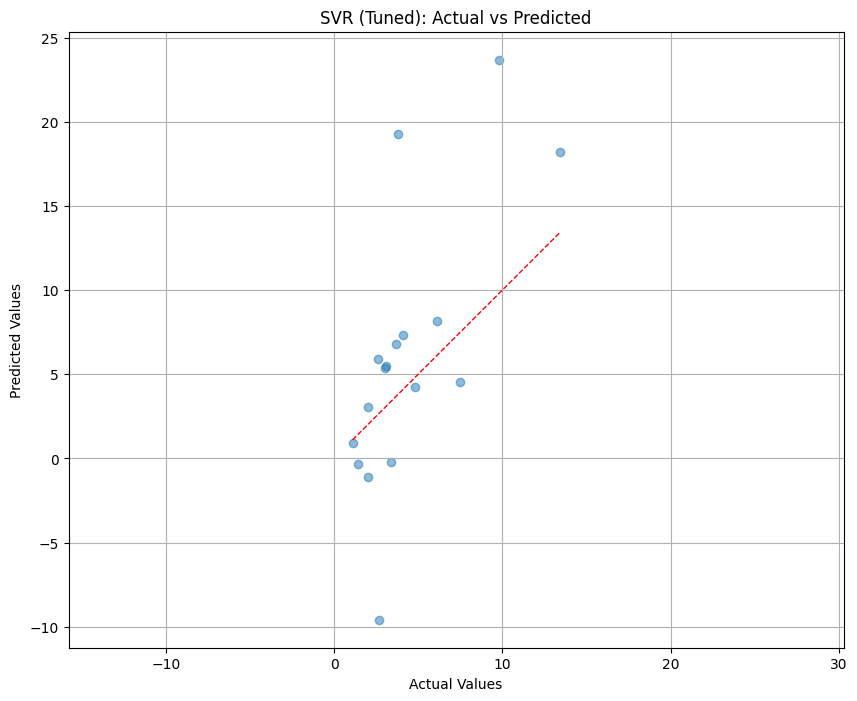

SVR Results:
Best Parameters: {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}
Best MSE (cross-validation): 193.0485
Test MSE: 40.5453
Predicted values: [23.69007472 -0.2333232   8.19208767 -0.33846294 -9.58406505  3.06676781
 18.18421238  5.93580311  0.91452074 -1.12015099  7.35148366  4.24233908
  4.5346907   5.49060403  6.77977101 19.27513956  5.35735836]

Tuning Lasso...


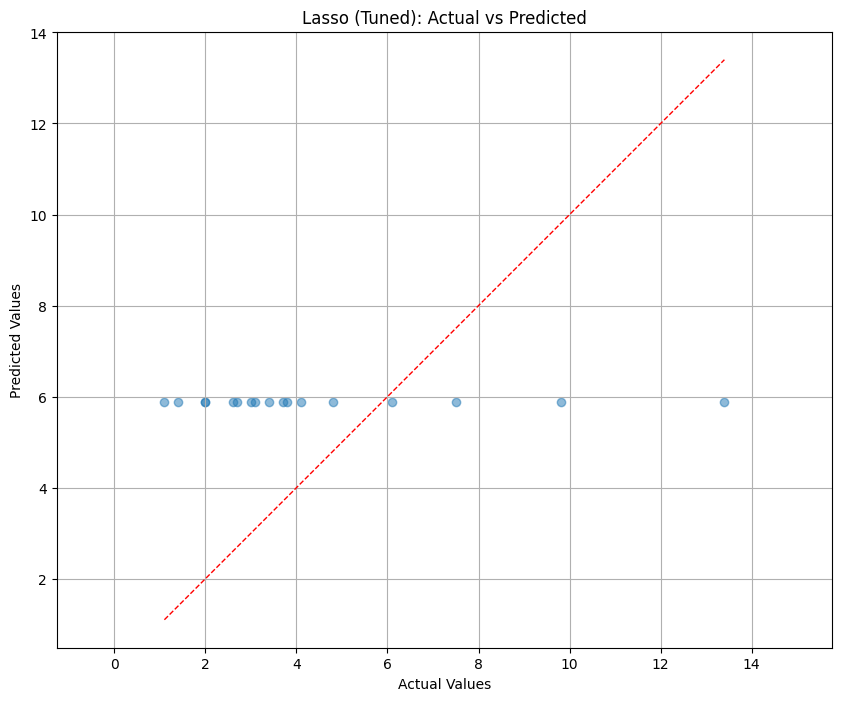

Lasso Results:
Best Parameters: {'alpha': 10.0, 'max_iter': 1000}
Best MSE (cross-validation): 207.6022
Test MSE: 12.0077
Predicted values: [5.88111111 5.88111111 5.88111111 5.88111111 5.88111111 5.88111111
 5.88111111 5.88111111 5.88111111 5.88111111 5.88111111 5.88111111
 5.88111111 5.88111111 5.88111111 5.88111111 5.88111111]


In [10]:
# NOT IN USE Training and plotting

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.array(y_test))

# Example for Regression Models
def train_regression_models():
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Random Forest': RandomForestRegressor(),
        'SVR': SVR(),
        'Lasso': Lasso()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)

        # Create scatter plot of actual vs predicted values
        plt.figure(figsize=(10,8))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values') 
        plt.title(f'{name}: Actual vs Predicted')
        
        # Set equal scaling
        plt.axis('equal')
        plt.grid(True)
        plt.show()

        print(np.array(y_pred))
        results[name] = mse
        print(f'{name} MSE: {mse:.4f}')
    return results


def train_regression_models_with_tuning():
    # Parameter grids for each model
    param_grids = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['rbf', 'linear'],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'max_iter': [1000, 2000]
            }
        }
    }
    
    results = {}
    for name, model_info in param_grids.items():
        print(f"\nTuning {name}...")
        
        # Use GridSearchCV
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['params'],
            cv=5,  # 5-fold cross-validation
            scoring='neg_mean_squared_error',
            n_jobs=-1  # Use all available cores
        )
        
        # Fit the model
        grid_search.fit(X_train_scaled, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        
        # Plot results
        plt.figure(figsize=(10,8))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} (Tuned): Actual vs Predicted')
        plt.axis('equal')
        plt.grid(True)
        plt.show()
        
        # Store and print results
        results[name] = {
            'mse': mse,
            'best_params': grid_search.best_params_,
            'best_score': -grid_search.best_score_  # Convert back from negative MSE
        }
        print(f'{name} Results:')
        print(f'Best Parameters: {grid_search.best_params_}')
        print(f'Best MSE (cross-validation): {-grid_search.best_score_:.4f}')
        print(f'Test MSE: {mse:.4f}')
        print(f'Predicted values: {np.array(y_pred)}')

    return results

# Run the tuned models
results_tuned = train_regression_models_with_tuning()

# Use the default hyperparameters
# results = train_regression_models()

def visualize_model_comparison(results):
    # Create a bar plot comparing MSE scores across models
    plt.figure(figsize=(10, 6))
    
    # Handle potential scalar values
    mse_scores = {}
    for name, result in results.items():
        if isinstance(result, dict):
            mse_scores[name] = result['mse']
        else:
            mse_scores[name] = result  # Assume scalar value is the MSE
            
    models = list(mse_scores.keys())
    scores = list(mse_scores.values())
    
    plt.bar(models, scores)
    plt.title('Model Comparison: Mean Squared Error')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Create a comparison dataframe
    comparison_data = {
        'Average MSE': [mse_scores[model] for model in models],
        'Std MSE': [mse_scores[model] ** 0.5 for model in models]  # Using MSE from scores dict
    }
    comparison_df = pd.DataFrame(comparison_data, index=models)
    display(comparison_df)

# Visualize the model comparison
# visualize_model_comparison(results)



[7.3 5.4 7.8 5.2 7.6 5.6 6.9 5.  7.8 8.1 7.8 5.2 4.9 8.  5.4 5.2 7.6 5.
 4.8 7.8 7.6 8.  8.3 7.5 7.9 7.1 5.3 4.9 7.8 4.5]

Tuning Ridge...


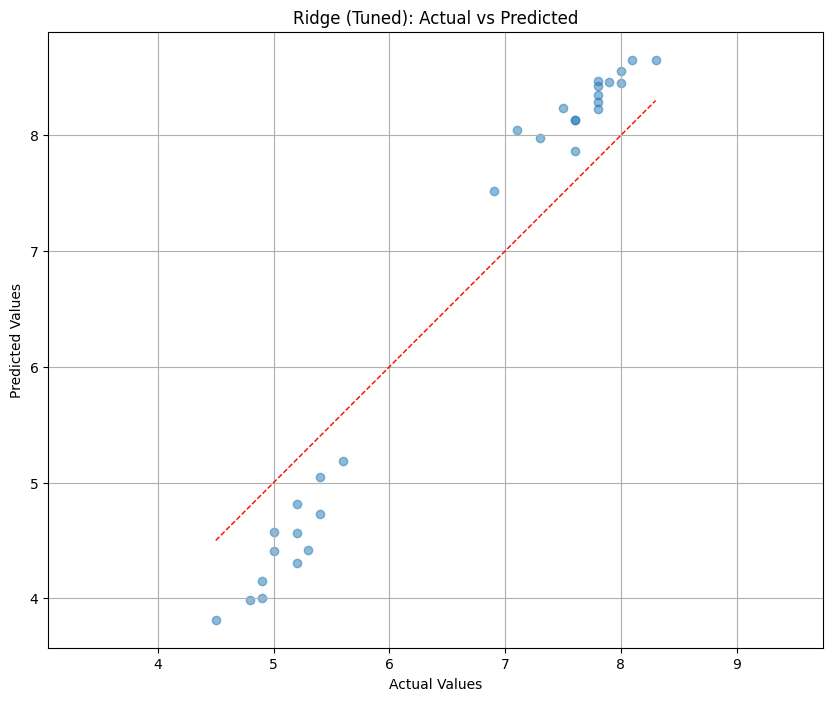

Ridge Results:
Best Parameters: {'alpha': 0.1, 'solver': 'svd'}
Best MSE (cross-validation): 0.0263
Test MSE: 0.3884
Predicted values: [7.97766591 5.04440251 8.47226236 4.81604095 8.13466925 5.18233801
 7.51964011 4.56876428 8.42658418 8.64874533 8.23045273 4.56744331
 4.14915071 8.45309173 4.72549896 4.30720636 8.13627256 4.40513741
 3.98684482 8.28673196 7.86843936 8.55261129 8.65305432 8.23476172
 8.462762   8.0444694  4.42115797 4.00286537 8.34655336 3.81510115]

Tuning SVR...


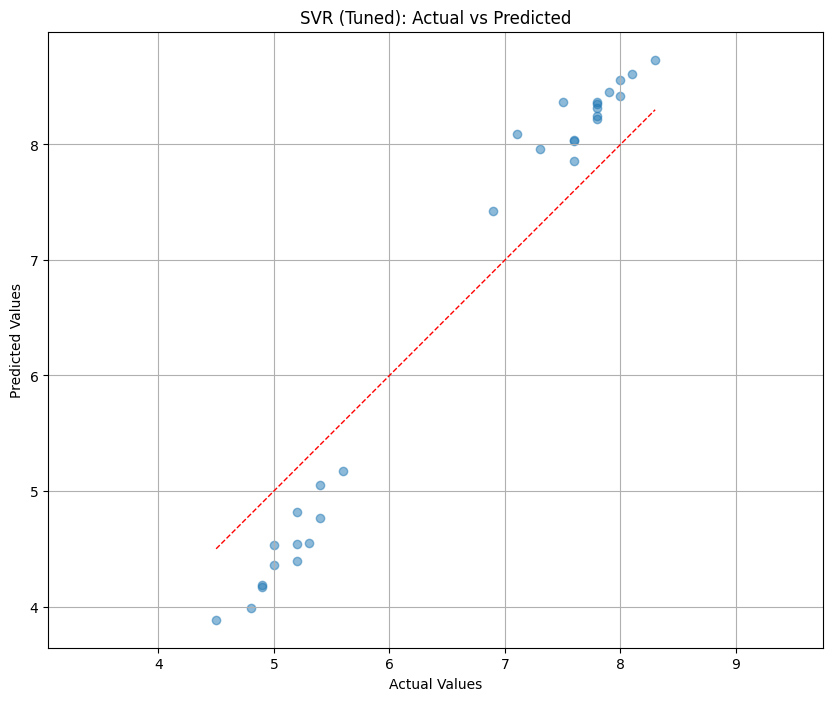

SVR Results:
Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Best MSE (cross-validation): 0.0191
Test MSE: 0.3530
Predicted values: [7.96210372 5.05595023 8.34837202 4.82220305 8.03913744 5.17620808
 7.41995702 4.53335605 8.3689112  8.61244851 8.24521216 4.53804814
 4.17081179 8.41993694 4.76464555 4.3974092  8.03009746 4.35690592
 3.98966957 8.22131086 7.85407451 8.55911063 8.73325886 8.3660225
 8.45659749 8.08936114 4.55158749 4.18435114 8.31484124 3.88600656]

Tuning Lasso...


c:\Users\88\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e-01, tolerance: 2.328e-02
  model = cd_fast.enet_coordinate_descent(


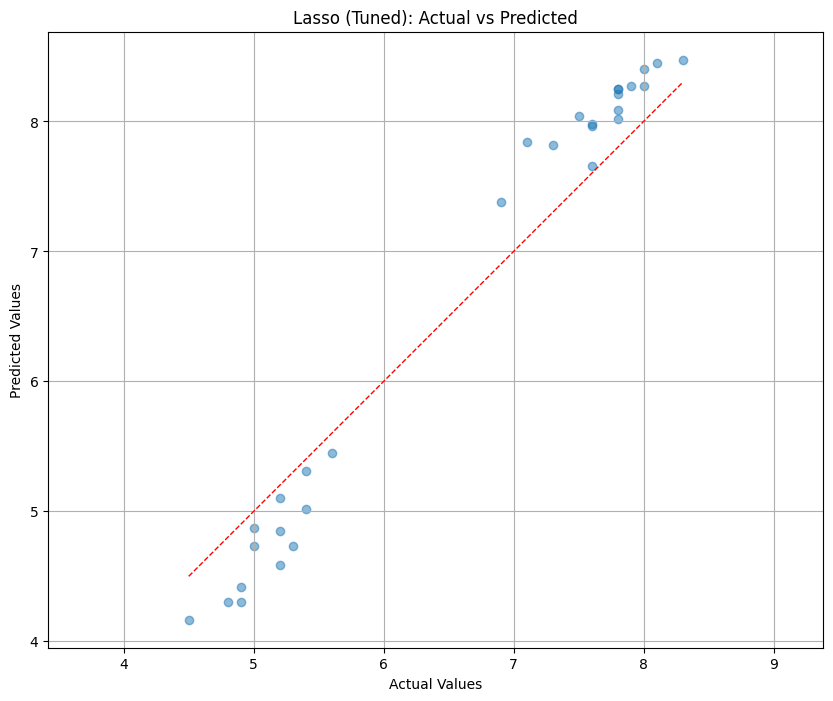

Lasso Results:
Best Parameters: {'alpha': 0.001, 'max_iter': 1000}
Best MSE (cross-validation): 0.0247
Test MSE: 0.1637
Predicted values: [7.81504688 5.30732449 8.2536099  5.09987279 7.9638243  5.44616217
 7.37891938 4.87479059 8.25291631 8.44862915 8.0178792  4.84697206
 4.41622211 8.27211998 5.01482092 4.58407097 7.97854102 4.73335812
 4.30260817 8.09121105 7.6604611  8.403022   8.47507873 8.04432877
 8.27204173 7.84129178 4.73278109 4.30203114 8.20972579 4.16603144]


In [23]:
# NOT IN USE Training and plotting only for selected models

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.array(y_test))

def train_selected_regression_models_with_tuning():
    # Parameter grids for each model
    param_grids = {
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['rbf', 'linear'],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                'max_iter': [1000, 2000]
            }
        }
    }
    
    results = {}
    for name, model_info in param_grids.items():
        print(f"\nTuning {name}...")
        
        # Use GridSearchCV
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['params'],
            cv=5,  # 5-fold cross-validation
            scoring='neg_mean_squared_error',
            n_jobs=-1  # Use all available cores
        )
        
        # Fit the model
        grid_search.fit(X_train_scaled, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        
        # Plot results
        plt.figure(figsize=(10,8))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} (Tuned): Actual vs Predicted')
        plt.axis('equal')
        plt.grid(True)
        plt.show()
        
        # Store and print results
        results[name] = {
            'mse': mse,
            'best_params': grid_search.best_params_,
            'best_score': -grid_search.best_score_  # Convert back from negative MSE
        }
        print(f'{name} Results:')
        print(f'Best Parameters: {grid_search.best_params_}')
        print(f'Best MSE (cross-validation): {-grid_search.best_score_:.4f}')
        print(f'Test MSE: {mse:.4f}')
        print(f'Predicted values: {np.array(y_pred)}')

    return results

# Run the tuned models
results_tuned = train_selected_regression_models_with_tuning()

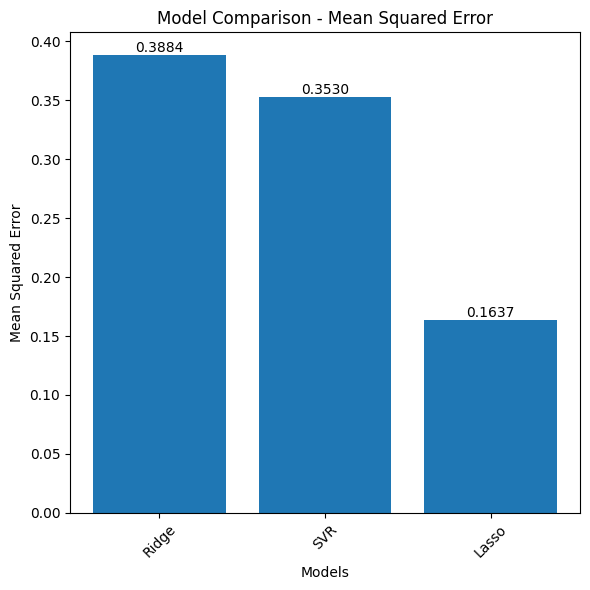

,Best MSE (CV),Test MSE,Best Parameters
Ridge,0.026312,0.388360,"{'alpha': 0.1, 'solver': 'svd'}"
SVR,0.019084,0.352994,"{'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}"
Lasso,0.024697,0.163720,"{'alpha': 0.001, 'max_iter': 1000}"


In [24]:
# NOT IN USE Visualization
def visualize_model_comparison(results_tuned):
    # Create a bar plot comparing MSE scores across models
    plt.figure(figsize=(6, 6))

    mse_scores = {name: results['mse'] for name, results in results_tuned.items()}
    models = list(mse_scores.keys())
    scores = list(mse_scores.values())

    bars = plt.bar(models, scores)
    plt.title('Model Comparison - Mean Squared Error')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Create a comparison table of best parameters and scores
    comparison_data = {
        'Best MSE (CV)': [results['best_score'] for results in results_tuned.values()],
        'Test MSE': [results['mse'] for results in results_tuned.values()],
        'Best Parameters': [str(results['best_params']) for results in results_tuned.values()]
    }

    comparison_df = pd.DataFrame(comparison_data, index=models)
    display(comparison_df)
    
# Visualize the model comparison
visualize_model_comparison(results_tuned)


# Others

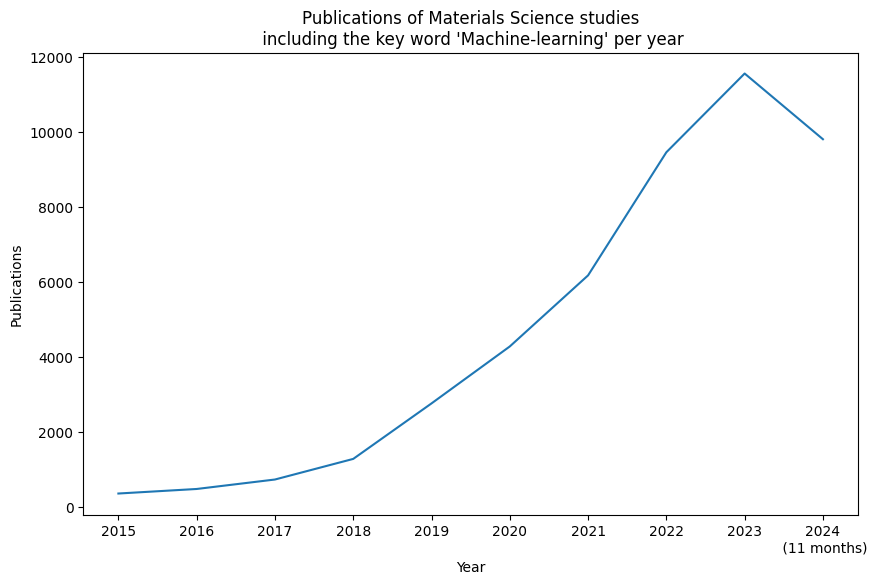

In [21]:
publications = [366, 487, 739, 1288, 2766, 4283, 6176, 9455, 11552, 9802]
time = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024\n (11 months)"]

plt.figure(figsize=(10, 6))
plt.plot(time, publications)
plt.title("Publications of Materials Science studies\n including the key word 'Machine-learning' per year")
plt.xlabel("Year")
plt.ylabel("Publications")
plt.show()
